# Sprint 機械学習スクラッチ 決定木

# 1.このSprintについて

Sprintの目的
スクラッチを通して決定木を理解する
複雑なアルゴリズムの実装に慣れる

どのように学ぶか
スクラッチで決定木を実装した後、学習と検証を行なっていきます。

# 2.決定木学習とは

決定木学習は 決定木 と呼ばれる 木構造のグラフ を作る機械学習手法です。機械学習の分野では学習手法も単に「決定木」と呼ばれます。


分類にも回帰にも使え、分類の場合3クラス以上の多値分類が可能です。ここでは基本となる分類のみを扱います。

## 決定木とは
決定木は、属性 と 値 の組｛属性1：値1，属性2：値2, 属性3：値3,…，属性n：値n｝によって表現されたデータを、条件分岐を繰り返すことであるクラスに割り当てることができる木構造のグラフです。


以下の例は会場の気温という属性の値によって、開催と中止のクラスに割り当てるグラフです。「会場の気温という属性の値は35以上かどうか」という条件分岐1回による決定木による分類が行えます。例えば36度がこの決定木にインプットされれば、中止というアウトプット（判断）ができます。

<img src="../img/06_1.png"></img>

なお、「属性と値」は機械学習の分野では「特徴量の名前と特徴量の値」のことです。これ以降は単に特徴量という呼びます。

## 各種用語
もう少し複雑な例で決定木で重要な用語を確認します。特徴量が「雨量」「屋内かどうか」「風の強さ」の3種類で、イベントの開催か中止かを分類する場合で考えてみます。訓練データを学習することで、以下のような決定木が作れます。



丸で囲われたひとつひとつを ノード と呼びます。ノードには親子関係を考えることができ、例えば(0)のノードは(1)(2)(3)のノードの 親ノード と呼びます。逆に、(1)(2)(3)のノードは(0)のノードの 子ノード と呼びます。


一番上の(0)は 根ノード 、 末端の(1)(4)(5)(7)(8)(9)のような分類結果を表すノードは 葉ノード と呼びます。


条件分岐の矢印は エッジ と呼びます。あるノードから根ノードまでのエッジの数が 深さ です。(3)の深さは1、(6)の深さは2、(9)の深さは3という風になります。この決定木の最大の深さは3です。


これは(0)に対して(1)(2)(3)の3つのノードが分かれている多岐分岐の決定木ですが、機械学習では2つにしか分かれないものが一般的です。学習時の複雑さを減らすためです。

## どう決定木を作るか
決定木の学習には様々なやり方が存在しますが、その中のある方法についてスクラッチを行いながら見ていきます。


学習方法やハイパーパラメータ、訓練データ次第で作られる決定木は異なってきます。

## 推定を考える
以下の場合、イベントは開催されるでしょうか。決定木を使って判断してください。

<img src="../img/06_3.png"></img>

答えは「開催」です。以下の赤線の順でたどっていきます。

<img src="../img/06_4.png"></img>

これが決定木による推定の操作になります。

## 扱える特徴量
決定木は理論上は量的変数だけでなく、カテゴリ変数も扱えます。しかし、scikit-learnの実装では量的変数のみに対応していますので、スクラッチ実装もそのように作成します。上記の例ですと「会場の種類」で「屋内と屋外」ですとカテゴリ変数ですが、「屋内かどうか」で「0と1」と量的変数にすることで扱えるようにしています。

# 3.決定木スクラッチ

分類のための決定木のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


決定木の学習には何回まで条件分岐を繰り返すかを表す （最大の）深さ というハイパーパラメータが登場しますが、深さ1の実装を必須課題とします。深さが2以上のものはアドバンス課題とします。


学習の仕方には様々な方法がありますが、ここではscikit-learnでも使用されている CART法 をベースとした実装を行います。この方法では学習の複雑さを減らすために、 分岐は2つに分かれるのみ になります。


以下に雛形を用意してあります。このScratchDecesionTreeClassifierDepth1クラスにコードを書き加えていってください。


##《雛形》

```
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        pass
        return
```

## 【まとめ】最終コード

In [1]:
# ライブラリインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
class ScratchDecesionTreeClassifier():
    """
    決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False, max_depth=None, min_samples_leaf=0):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf


    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        # yラベルを格納
        self.y_labels = (np.min(y), np.max(y))

        # 分岐処理
        self.treeNode = TreeNode(self.y_labels, self.max_depth, self.min_samples_leaf, self.verbose)
        self.treeNode.branch(X, y)


    def predict(self, X):
        """
        決定木分類器の予測結果を返却
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量

        Returns
        -----------
        y_pred : ndarray, shape (n_samples, )
        """
        y_pred = []
        for row in X:
            y_pred.append(self.treeNode.predict(row))

        return np.array(y_pred)


In [3]:
class TreeNode():
    def __init__(self, y_labels, max_depth, min_samples_leaf, verbose):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.verbose = verbose

        # yラベルの情報
        self.y_labels = y_labels
        self.class_a = y_labels[0]
        self.class_b = y_labels[1]

        # 再帰処理用
        self.left_node = None
        self.right_node = None

        # 処理停止フラグ
        self.stop = False

        # ノードの情報
        self.position = [0, 0]
        self.feature_idx_ = None
        self.threshold_ = None
        self.ig_ = None
        self.gini_ = None
        self.samples_ = None
        self.value_ = []
        self.class_ = None
        self.node_info = {}



    def branch(self, X, y, depth=0, left_right='root'):
        """
        分類木の分岐処理

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            yラベル
        depth : int
            現在の深さ
        left_right : str
            左右どちらの分岐か

        Returns
        -----------
        node_info : dict
            分岐結果の情報を返却
            ※返却値をNoneにしないために返却している
        """

        # 位置座標取得（処理経過表示用）
        self.position[0] = depth
        if left_right == 'left':
            self.position[1] = self.position[1]*2
        elif left_right == 'right':
            self.position[1] = self.position[1]*2 + 1

        # ノードの基本情報取得
        self._set_base_info(y)

        # 処理中止判定
        if np.min(self.value_) <= self.min_samples_leaf \
        or self.gini_ == 0 \
        or (self.max_depth != None and depth >= self.max_depth):
            # デバッグ
            if self.verbose:
                print('[INFO] Position = {}, info = {}'.format(self.position, self.node_info))
            self.stop = True
            return self.node_info

        # 決定木の分岐処理
        div_X, div_y = self._branch_processing(X, y)

        # デバッグ
        if self.verbose:
            print('[INFO] Position = {}, info = {}'.format(self.position, self.node_info))

        # 再帰処理
        self.left_node = TreeNode(self.y_labels, self.max_depth, self.min_samples_leaf, verbose=self.verbose)
        self.left_node.branch(div_X[0], div_y[0], depth+1, left_right='left')
        self.right_node = TreeNode(self.y_labels, self.max_depth, self.min_samples_leaf, verbose=self.verbose)
        self.right_node.branch(div_X[1], div_y[1], depth+1, left_right='right')

        pass


    def _branch_processing(self, X, y):
        """
        分類木の分岐処理

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            yラベル
        depth : int
            現在の深さ
        left_right : str
            左右どちらの分岐か

        Returns
        -----------
        node_info : dict
            分岐結果の情報を返却
            ※返却値をNoneにしないために返却している
        """
        # Xデータの形状
        n_samples = X.shape[0]
        n_features = X.shape[1]

        # 最も良い分割条件保存用
        best_feature = (0, 0, 0, None, None)

        # 分割処理
        for feature_idx in range(n_features):
            for threshold in np.unique(X[:, feature_idx]):
                div_y = (y[X[:, feature_idx] >= threshold], y[X[:, feature_idx] < threshold])
                ig = self._calc_ig(y, div_y[0], div_y[1])
                if ig > best_feature[2]:
                    div_X = (X[X[:, feature_idx] >= threshold], X[X[:, feature_idx] < threshold])
                    best_feature = (feature_idx, threshold, ig, div_y, div_X)
        
        # ノードの情報をインスタンス変数へセット
        self._set_div_info(best_feature)

        # 分割後のX, yのデータの保持
        div_X, div_y = best_feature[4], best_feature[3]
        del best_feature

        return div_X, div_y


    
    def _calc_gini(self, y):
        """
        ジニ不純度を計算

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            yラベル

        Returns
        -----------
        gini : float
            ジニ不純度
        """
        n = np.sum((y == self.class_a, y == self.class_b), axis=1)
        gini = 1 - np.sum((n/np.sum(n))**2)
        return gini


    def _calc_ig(self, y_all, y_left, y_right):
        """
        情報利得を計算

        Parameters
        ----------
        y_all : 次の形のndarray, shape (n_samples, )
            yラベル
        y_left : 次の形のndarray, shape (n_samples, )
            分割したyラベル
        y_right : 次の形のndarray, shape (n_samples, )
            分割したyラベル

        Returns
        -----------
        ig : float
            情報利得
        """
        gini_all, gini_left, gini_right = self._calc_gini(y_all), self._calc_gini(y_left), self._calc_gini(y_right)
        n_all, n_left, n_right = y_all.shape[0], y_left.shape[0], y_right.shape[0]
        ig = gini_all - (n_left*gini_left/n_all) - (n_right*gini_right/n_all)
        return ig


    def _set_base_info(self, y):
        """
        ノードの基本情報をインスタンス変数へセット

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            yラベル

        """
        self.gini_ = self._calc_gini(y)
        self.samples_ = len(y)
        self.value_ = [np.sum(y == self.class_a), np.sum(y == self.class_b)]
        self.class_ = self.class_a if self.value_[0] >= self.value_[1] else self.class_b
        self.node_info = {'feature_idx': None,
                          'threshold': None,
                          'ig': None,
                          'gini': self.gini_,
                          'samples': self.samples_,
                          'value': self.value_,
                          'class': self.class_}

    def _set_div_info(self, best_feature):
        """
        ノードの分岐情報をインスタンス変数へセット

        Parameters
        ----------
        best_feature : list
            分岐に使用した特徴量のインデックス・閾値・情報利得

        """
        self.feature_idx_ = best_feature[0]
        self.threshold_ = best_feature[1]
        self.ig_ = best_feature[2]
        self.node_info['feature_idx'] = self.feature_idx_
        self.node_info['threshold'] = self.threshold_
        self.node_info['ig'] = self.gini_



    def predict(self, X):
        """
        作成した決定木モデルで予測

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量

        """
        if self.stop:
            return self.class_
        if X[self.feature_idx_] >= self.threshold_:
            return self.left_node.predict(X)
        else:
            return self.right_node.predict(X)

   

## 【問題1～問題6】まとめコード
アドバンス問題へ取り組む前のコード

In [4]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        # インスタンス変数
        self.class_left = y.min()    # クラスAの値
        self.class_right = y.max()    # クラスBの値
        self.max_ig = (0, 0, 0, None)
        self.node_info = None
        self.left_node_info = None
        self.right_node_info = None

        
        # 分岐
        self._branch_processing(X, y)
        
        
        # デバッグ
        if self.verbose:
            print()
        pass

    
    
    def _branch_processing(self, X, y):
        """
        決定木の分岐処理
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
             
        for X_idx in range(n_features):
            for threshold in np.unique(X[:, X_idx]):
                div_y = (y[X[:, X_idx] >= threshold], y[X[:, X_idx] < threshold])
                ig = self._calc_ig(y, div_y[0], div_y[1])
                if ig > self.max_ig[2]:
                    self.max_ig = (X_idx, threshold, ig, div_y)
                    
        self.node_info = self._set_info(y, self.max_ig[0], self.max_ig[1], self.max_ig[2])
        self.left_node_info = self._set_info(self.max_ig[3][0])
        self.right_node_info = self._set_info(self.max_ig[3][1])
    
    
    def _calc_gini(self, y):
        """
        ジニ不純度を計算
        """
        # n = (np.sum(y == self.class_left), np.sum(y == self.class_right))
        n = np.sum((y == self.class_left, y == self.class_right), axis=1)
        gini = 1 - np.sum((n/np.sum(n))**2)
        return gini
    
    

    def _calc_ig(self, y_all, y_left, y_right):
        """
        情報利得を計算
        """
        gini_all, gini_left, gini_right = calc_gini(y_all), calc_gini(y_left), calc_gini(y_right)
        n_all, n_left, n_right = y_all.shape[0], y_left.shape[0], y_right.shape[0]
        ig = gini_all - (n_left*gini_left/n_all) - (n_right*gini_right/n_all)
        return ig
                    
    
    
    def _set_info(self, y, X_idx=None, threshold=None, ig=None):
        n_left, n_right = np.sum(y == self.class_left), np.sum(y == self.class_right)
        class_ = self.class_left if n_left >= n_right else self.class_right
        info = {'column_idx': X_idx, 
                'threshold': threshold,
                'ig': ig,
                'gini': self._calc_gini(y),
                'samples': len(y),
                'value': [n_left, n_right],
                'class': class_}
        return info


    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        idx = np.where(X[:, self.node_info['column_idx']] >= self.node_info['threshold'])
        y_pred = np.full([X.shape[0], 1], self.class_left)
        y_pred[idx[0]] = self.class_right
        return y_pred

## 分割の条件を学習で求める
学習によって、ノードをどういった条件で分割すると、うまく分けられるかということを求めます。


うまく分けられていることを判定するためにノードに対してジニ不純度と情報利得という値を計算します。

## 【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード 
$t$
 に対するジニ不純度 
$I(t)$ は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。

$$
  I(t)
  = 1 - \sum_{i=1}^{K}P^2(C_i|t) = 1 - \sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^2
$$

t
 : ノードのインデックス


i
 : クラスのインデックス


K
 : クラスの数


C
i
 : i番目のクラス


P
(
C
i
|
t
)
 :　t番目のノードにおける
C
i
の割合


N
t
,
i
 : t番目のノードのi番目のクラスに属するサンプル数


N
t
,
a
l
l
 : t番目のノードのサンプルの総数


 まずは簡単な例を作り、手計算と関数の結果を比較してください。

《例》

- クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
- クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
- クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000

In [5]:
def calc_gini(y):
    # 注）クラスメソッドとして組み込むときはclass_a, class_bの値はインスタンス変数として保持する。
    class_left = 0
    class_right = 1

    n = (np.sum(y == class_left), np.sum(y == class_right))
    gini = 1 - np.sum((n/np.sum(n))**2)
    return gini

In [6]:
# クラスラベルのサンプルデータ生成用
def make_simple_sample(num_class_0, num_class_1):
    a = np.zeros([num_class_0, 1])
    b = np.ones([num_class_1, 1])
    ab = np.concatenate([a,b], axis=0)
    return ab

test1 = make_simple_sample(15, 15)
test2 = make_simple_sample(18, 12)
test3 = make_simple_sample(30, 0)

In [7]:
calc_gini(test1)

0.5

In [8]:
calc_gini(test2)

0.48

In [9]:
calc_gini(test3)

0.0

## 【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 
I
(
t
)
 を計算する関数を呼び出して使います。情報利得
I
G
は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。


ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。

$$
  IG(p)
  = I(p) - \frac{N_{left, all}}{N_{p, all}}I(left) - \frac{N_{right, all}}{N_{p, all}}I(right)
$$

p
 : 親ノードを示すインデックス


l
e
f
t
 : 左側のノードを示すインデックス


r
i
g
h
t
 : 右側のノードを示すインデックス


まずは簡単な例を作り、手計算と関数の結果を比較してください。

《例》


左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 

右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 

→ 情報利得0.143



In [10]:
def calc_ig(root, left, right):
    gini_root, gini_left, gini_right = calc_gini(root), calc_gini(left), calc_gini(right)
    n_root , n_left, n_right = root.shape[0], left.shape[0], right.shape[0]
    IG = gini_root - (n_left*gini_left / n_root) - (n_right*gini_right / n_root)
    return IG

In [11]:
# サンプルデータ生成
root1 = make_simple_sample(30, 35)
left1 = make_simple_sample(10, 30)
right1 = make_simple_sample(20, 5)

In [12]:
calc_ig(root1, left1, right1)

0.14319526627218937

In [13]:
# サンプルデータ生成
root2 = make_simple_sample(40, 40)
left2 = make_simple_sample(30, 10)
right2 = make_simple_sample(10, 30)

In [14]:
calc_ig(root2, left2, right2)

0.125

In [15]:
# サンプルデータ生成
root3 = make_simple_sample(40, 40)
left3 = make_simple_sample(20, 40)
right3 = make_simple_sample(20, 0)

In [16]:
calc_ig(root3, left3, right3)

0.16666666666666669

## 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。


《組み合わせの取り方》


全ての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。


他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。


《補足》


問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 
I
(
p
)
 は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。



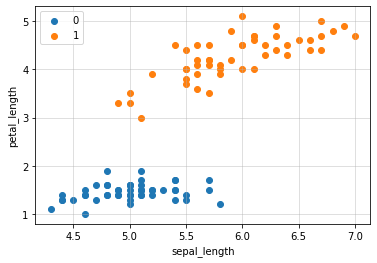

In [17]:
# サンプルデータ（アイリスデータ）ロード
iris_dataset = load_iris()

# 初期設定
columns_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(iris_dataset['data'], columns=columns_list)
df['target'] = iris_dataset['target']

# 必要なデータのみ抽出
df = df[df['target'] != 2]
x = np.array(df[['sepal_length', 'petal_length']])
y = np.array(df['target'])[:, np.newaxis]

# グラフ化
x0 = df[['sepal_length', 'petal_length']][df['target'] == 0]
x1 = df[['sepal_length', 'petal_length']][df['target'] == 1]
plt.scatter(x0['sepal_length'], x0['petal_length'], label=0)
plt.scatter(x1['sepal_length'], x1['petal_length'], label=1)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.grid(True, alpha=.5)
plt.legend(loc='best')
plt.show()

In [18]:
# 学習実行
sdt1 = ScratchDecesionTreeClassifierDepth1()
sdt1.fit(x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [19]:
sdt1.node_info

{'class': 0,
 'column_idx': 1,
 'gini': 0.5,
 'ig': 0.5,
 'samples': 100,
 'threshold': 3.0,
 'value': [50, 50]}

In [20]:
sdt1.left_node_info

{'class': 1,
 'column_idx': None,
 'gini': 0.0,
 'ig': None,
 'samples': 50,
 'threshold': None,
 'value': [0, 50]}

In [21]:
sdt1.right_node_info

{'class': 0,
 'column_idx': None,
 'gini': 0.0,
 'ig': None,
 'samples': 50,
 'threshold': None,
 'value': [50, 0]}

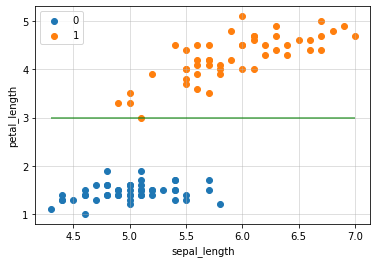

In [22]:
# グラフ化
x0 = df[['sepal_length', 'petal_length']][df['target'] == 0]
x1 = df[['sepal_length', 'petal_length']][df['target'] == 1]
plt.scatter(x0['sepal_length'], x0['petal_length'], label=0)
plt.scatter(x1['sepal_length'], x1['petal_length'], label=1)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.hlines(sdt1.node_info['threshold'], x[:,0].min(), x[:,0].max(), color='green', alpha=.7)
plt.grid(True, alpha=.5)
plt.legend(loc='best')
plt.show()

## 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

In [23]:
y_pred = sdt1.predict(x)
print('予測結果：', np.squeeze(y_pred))
print('正解率：', metrics.accuracy_score(y, y_pred))

予測結果： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
正解率： 1.0


## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。



In [24]:
X2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
# 分割
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [26]:
# 学習実行
sdt2 = ScratchDecesionTreeClassifierDepth1()
sdt2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [27]:
y_pred = sdt2.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.5

In [28]:
# 混同行列
def cf_matrix(y_test, y_pred):
    confusion = metrics.confusion_matrix(y_test, y_pred)
    data = pd.DataFrame(confusion, index=[1,2], columns=[1,2])
    plt.figure(figsize=(5, 3))
    sns.heatmap(data, cmap='Pastel1', cbar=False, annot_kws={"size": 22}, annot=True, fmt="d", linewidths=1)
    plt.title("Confusion-matrix", fontsize=14)
    plt.xlabel("Predicted value", fontsize=12)
    plt.ylabel("Observed value", fontsize=12)
    plt.show()

正解率：0.5


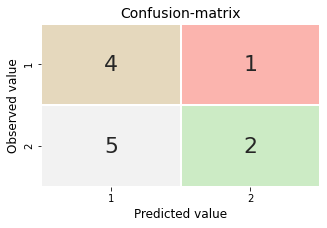

              precision    recall  f1-score   support

          X1       0.44      0.80      0.57         5
          X2       0.67      0.29      0.40         7

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



In [29]:
# 正解率
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred)))

# 混同行列
cf_matrix(y_test, y_pred)

# 評価指標
target_names = ['X1', 'X2']
scores = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(scores)

In [30]:
# sklearn
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, y_train)
y_pred_sk = model.predict(X_test)

正解率：0.5


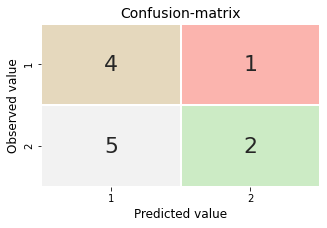

              precision    recall  f1-score   support

          X1       0.44      0.80      0.57         5
          X2       0.67      0.29      0.40         7

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



In [31]:
# 正解率
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred)))

# 混同行列
cf_matrix(y_test, y_pred)

# 評価指標
target_names = ['X1', 'X2']
scores = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(scores)

## 【問題6】決定領域の可視化
決定領域を可視化してください。

In [32]:
def decision_region(X, y, model, step=0.01, title='decision region', 
                    xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'],
                    n_class=2):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """

    # setting
    if n_class == 2:
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
    elif n_class == 3:
        scatter_color = ['green', 'red', 'blue']
        contourf_color = ['lightgreen', 'pink', 'skyblue']

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, 
                                             np.max(X[:,0])+0.5, step), 
                                   np.arange(np.min(X[:,1])-0.5, 
                                             np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    y = np.squeeze(y)  # 2020-08-10 追加
    for i, target in enumerate(set(list(y))):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
#     plt.scatter(model.support_vector[:, 0], model.support_vector[:, 1], s=50, color='yellow', marker='o', alpha=.6, label='support vector')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

### スクラッチで実行

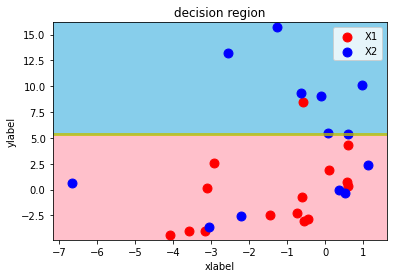

In [33]:
decision_region(X_train, y_train, sdt2, target_names=['X1', 'X2'])

### scikit-learnで実行

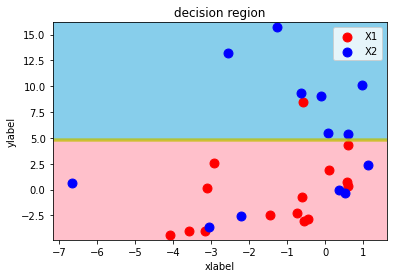

In [34]:
decision_region(X_train, y_train, model, target_names=['X1', 'X2'])

## 5.より深い決定木



## 【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成
深さが2の決定木分類器のクラスScratchDecesionTreeClassifierDepth2を作成してください。


深さ2とは空間の分割を2回行うことを指します。


《ヒント》


各ノードをインスタンスとして扱うと、任意の深さへの拡張が行いやすくなります。

In [35]:
data_X = X_train
data_y = y_train

### 深さ1で実行

[INFO] Position = [0, 0], info = {'feature_idx': 1, 'threshold': 5.3524, 'ig': 0.49744897959183676, 'gini': 0.49744897959183676, 'samples': 28, 'value': [15, 13], 'class': 0}
[INFO] Position = [1, 0], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.21875, 'samples': 8, 'value': [1, 7], 'class': 1}
[INFO] Position = [1, 1], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.42000000000000004, 'samples': 20, 'value': [14, 6], 'class': 0}
y_pred : [1 0 0 0 0 0 0 0 1 1 0 0]
正解率：0.5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:151: RuntimeWarning: invalid value encountered in true_divide


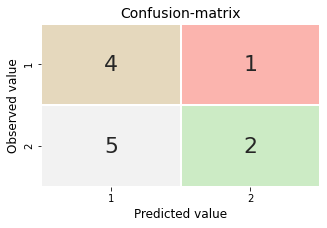

              precision    recall  f1-score   support

          X1       0.44      0.80      0.57         5
          X2       0.67      0.29      0.40         7

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



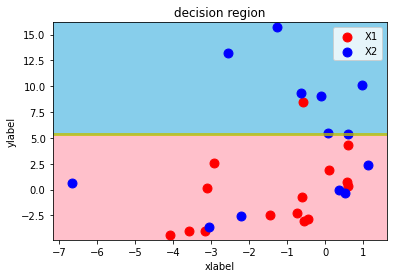

In [40]:
# 学習
model = ScratchDecesionTreeClassifier(max_depth=1, verbose=True)
model.fit(data_X, data_y)

# 予測
y_pred = model.predict(X_test)
print('y_pred :', y_pred)

# 正解率
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred)))

# 混同行列
cf_matrix(y_test, y_pred)

# 評価指標
target_names = ['X1', 'X2']
scores = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(scores)

# 決定領域
decision_region(X_train, y_train, model, target_names=['X1', 'X2'])

### 深さ2で実行

[INFO] Position = [0, 0], info = {'feature_idx': 1, 'threshold': 5.3524, 'ig': 0.49744897959183676, 'gini': 0.49744897959183676, 'samples': 28, 'value': [15, 13], 'class': 0}
[INFO] Position = [1, 0], info = {'feature_idx': 1, 'threshold': 9.0162, 'ig': 0.21875, 'gini': 0.21875, 'samples': 8, 'value': [1, 7], 'class': 1}
[INFO] Position = [2, 0], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.0, 'samples': 5, 'value': [0, 5], 'class': 1}
[INFO] Position = [2, 1], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.4444444444444444, 'samples': 3, 'value': [1, 2], 'class': 1}
[INFO] Position = [1, 1], info = {'feature_idx': 0, 'threshold': -4.1013, 'ig': 0.42000000000000004, 'gini': 0.42000000000000004, 'samples': 20, 'value': [14, 6], 'class': 0}
[INFO] Position = [2, 0], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.38781163434903054, 'samples': 19, 'value': [14, 5], 'class': 0}
[INFO] Position = [2, 1], info = {'feature_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:151: RuntimeWarning: invalid value encountered in true_divide


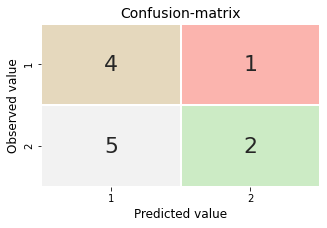

              precision    recall  f1-score   support

          X1       0.44      0.80      0.57         5
          X2       0.67      0.29      0.40         7

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



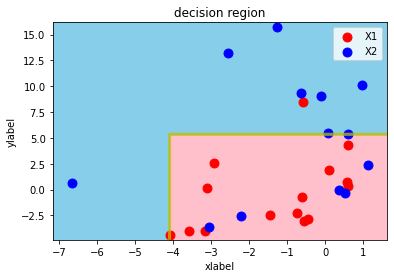

In [41]:
# 学習
model = ScratchDecesionTreeClassifier(max_depth=2, verbose=True)
model.fit(data_X, data_y)

# 予測
y_pred = model.predict(X_test)
print('y_pred :', y_pred)

# 正解率
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred)))

# 混同行列
cf_matrix(y_test, y_pred)

# 評価指標
target_names = ['X1', 'X2']
scores = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(scores)

# 決定領域
decision_region(X_train, y_train, model, target_names=['X1', 'X2'])

## 【問題8】（アドバンス課題）深さに制限のない決定木分類器クラスの作成
深さに制限のない決定木分類器のクラスScratchDecesionTreeClassifierDepthInfを作成してください。


任意の深さを指定できるようにするとともに、指定しない場合は全ての葉ノードがジニ不純度0となるまで続けられるようにもしてください。

### 深さ3で実行

[INFO] Position = [0, 0], info = {'feature_idx': 1, 'threshold': 5.3524, 'ig': 0.49744897959183676, 'gini': 0.49744897959183676, 'samples': 28, 'value': [15, 13], 'class': 0}
[INFO] Position = [1, 0], info = {'feature_idx': 1, 'threshold': 9.0162, 'ig': 0.21875, 'gini': 0.21875, 'samples': 8, 'value': [1, 7], 'class': 1}
[INFO] Position = [2, 0], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.0, 'samples': 5, 'value': [0, 5], 'class': 1}
[INFO] Position = [2, 1], info = {'feature_idx': 0, 'threshold': 0.057313, 'ig': 0.4444444444444444, 'gini': 0.4444444444444444, 'samples': 3, 'value': [1, 2], 'class': 1}
[INFO] Position = [3, 0], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.0, 'samples': 2, 'value': [0, 2], 'class': 1}
[INFO] Position = [3, 1], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.0, 'samples': 1, 'value': [1, 0], 'class': 0}
[INFO] Position = [1, 1], info = {'feature_idx': 0, 'threshold': -4.1013, 'ig':

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:151: RuntimeWarning: invalid value encountered in true_divide


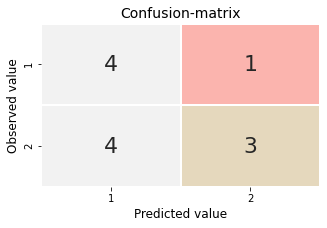

              precision    recall  f1-score   support

          X1       0.50      0.80      0.62         5
          X2       0.75      0.43      0.55         7

    accuracy                           0.58        12
   macro avg       0.62      0.61      0.58        12
weighted avg       0.65      0.58      0.57        12



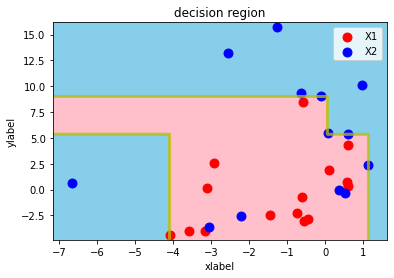

In [42]:
# 学習
model = ScratchDecesionTreeClassifier(max_depth=3, verbose=True)
model.fit(data_X, data_y)

# 予測
y_pred = model.predict(X_test)
print('y_pred :', y_pred)

# 正解率
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred)))

# 混同行列
cf_matrix(y_test, y_pred)

# 評価指標
target_names = ['X1', 'X2']
scores = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(scores)

# 決定領域
decision_region(X_train, y_train, model, target_names=['X1', 'X2'])

### 深さの制限なしで実行

[INFO] Position = [0, 0], info = {'feature_idx': 1, 'threshold': 5.3524, 'ig': 0.49744897959183676, 'gini': 0.49744897959183676, 'samples': 28, 'value': [15, 13], 'class': 0}
[INFO] Position = [1, 0], info = {'feature_idx': 1, 'threshold': 9.0162, 'ig': 0.21875, 'gini': 0.21875, 'samples': 8, 'value': [1, 7], 'class': 1}
[INFO] Position = [2, 0], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.0, 'samples': 5, 'value': [0, 5], 'class': 1}
[INFO] Position = [2, 1], info = {'feature_idx': 0, 'threshold': 0.057313, 'ig': 0.4444444444444444, 'gini': 0.4444444444444444, 'samples': 3, 'value': [1, 2], 'class': 1}
[INFO] Position = [3, 0], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.0, 'samples': 2, 'value': [0, 2], 'class': 1}
[INFO] Position = [3, 1], info = {'feature_idx': None, 'threshold': None, 'ig': None, 'gini': 0.0, 'samples': 1, 'value': [1, 0], 'class': 0}
[INFO] Position = [1, 1], info = {'feature_idx': 0, 'threshold': -4.1013, 'ig':

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:151: RuntimeWarning: invalid value encountered in true_divide


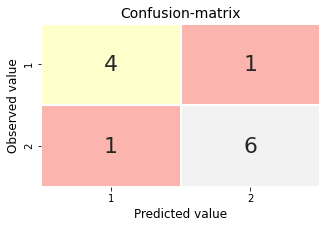

              precision    recall  f1-score   support

          X1       0.80      0.80      0.80         5
          X2       0.86      0.86      0.86         7

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



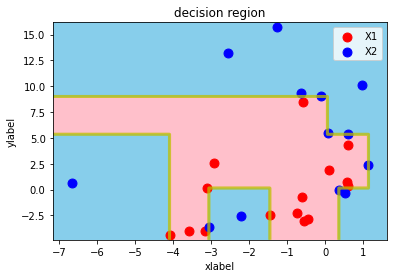

In [43]:
# 学習
model = ScratchDecesionTreeClassifier(max_depth=None, verbose=True)
model.fit(data_X, data_y)

# 予測
y_pred = model.predict(X_test)
print('y_pred :', y_pred)

# 正解率
print('正解率：{}'.format(metrics.accuracy_score(y_test, y_pred)))

# 混同行列
cf_matrix(y_test, y_pred)

# 評価指標
target_names = ['X1', 'X2']
scores = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(scores)

# 決定領域
decision_region(X_train, y_train, model, target_names=['X1', 'X2'])